<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Rabota_s_priznakami_i_postroenie_modelej/Funkcii_poter_i_optimizaciya/DZ_Funkcii_poter_i_optimizaciya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Преподаватель:** Юлия Пономарева

## **Задание**

**Цель:** изучить применение методов оптимизации для решения задачи классификации

**Описание задания:**

В домашнем задании необходимо применить полученные знания в теории оптимизации и машинном обучении для реализации логистической регрессии.

**Этапы работы:**

1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.
2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. Оформите в виде класса с методами.
3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

### 1. Загрузка данных и подготовка датасета:

In [318]:
# Импортируем необходимые библиотеки
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [319]:
# Загружаем датасет с ирисами
iris = datasets.load_iris()

In [320]:
# Выводим описание датасета
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [321]:
# Загрузка данных из датасета iris
print("Ключи словаря (iris.keys):", iris.keys())
print("\nДанные (iris.data):", iris.data[:5])
print("\nЦелевые значения (iris.target):", iris.target)
print("\nИмена классов (iris.target_names):", iris.target_names)
print("\nИмена признаков (iris.feature_names):", iris.feature_names)

Ключи словаря (iris.keys): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Данные (iris.data): [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Целевые значения (iris.target): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Имена классов (iris.target_names): ['setosa' 'versicolor' 'virginica']

Имена признаков (iris.feature_names): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [322]:
# Преобразуем датасет в DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [323]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [324]:
# Эта строка присваивает столбцу 'target' в DataFrame `df` значения из массива `iris.target`
df['target'] = iris.target

In [325]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [326]:
# принт уникальных значений target
unique_targets = df['target'].unique()
print(unique_targets)

[0 1 2]


In [327]:
# Ищем соответствие между метками классов и их именами
print("Метка класса 0:", iris.target_names[0])
print("Метка класса 1:", iris.target_names[1])
print("Метка класса 2:", iris.target_names[2])

Метка класса 0: setosa
Метка класса 1: versicolor
Метка класса 2: virginica


In [328]:
# Оставляем только два класса: Iris Versicolor (класс 1) и Iris Virginica (класс 2)
df = df[df['target'] != 0]

In [329]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [330]:
# Признаки и целевая переменная
X = df.drop(['target'], axis=1)
y = df['target']

In [331]:
y = y - 1  # Преобразование меток классов (1 и 2) в (0 и 1)

In [332]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 100, dtype: int64

In [333]:
# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [334]:
# Преобразование y_train и y_test для обучения модели
y_train = np.where(y_train == 1, 1, 0)
y_test = np.where(y_test == 1, 1, 0)

In [335]:
# Добавим столбец "единиц" к обучающим данным для учета смещения
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

### 2. Реализация логистической регрессии в виде функции:

In [336]:
# Инициализация весов
def initialize_weights(n):
    """
    Инициализация весов модели логистической регрессии.

    Параметры:
    n (int): количество признаков

    Возвращает:
    w (array): вектор весов размерности n
    b (float): смещение
    """
    w = np.zeros(n)
    b = 0
    return w, b

# Сигмоидная функция
def sigmoid(z):
    """
    Сигмоидная функция для преобразования результата линейной комбинации в вероятность.

    Параметры:
    z (array): линейная комбинация признаков и весов

    Возвращает:
    output (array): вероятность принадлежности к классу 1
    """
    return 1 / (1 + np.exp(-z))

# Функция предсказания
def predict(X, w, b):
    """
    Функция для предсказания меток классов на основе входных данных и параметров модели.

    Параметры:
    X (array): матрица признаков
    w (array): вектор весов модели
    b (float): смещение

    Возвращает:
    y_pred (array): предсказанные вероятности принадлежности к классу 1
    """
    z = np.dot(X, w) + b
    y_pred = sigmoid(z)
    return y_pred

# Функция вычисления стоимости (функция потерь)
def compute_cost(y, y_pred):
    """
    Функция для вычисления стоимости (функции потерь) модели логистической регрессии.

    Параметры:
    y (array): истинные метки классов
    y_pred (array): предсказанные вероятности принадлежности к классу 1

    Возвращает:
    cost (float): значение функции потерь
    """
    m = len(y)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    cost = (-1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Функция градиентного спуска
def gradient_descent(X, y, learning_rate, iterations):
    """
    Функция для обучения модели логистической регрессии с помощью градиентного спуска.

    Параметры:
    X (array): матрица признаков
    y (array): истинные метки классов
    learning_rate (float): скорость обучения
    iterations (int): количество итераций

    Возвращает:
    w (array): обновленные веса модели
    b (float): обновленное смещение
    cost_history (list): история значений функции потерь на каждой итерации обучения
    """
    m, n = X.shape
    w, b = initialize_weights(n)
    gd_cost_history = []

    for i in range(iterations):
        y_pred = predict(X, w, b)

        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = compute_cost(y, y_pred)
        gd_cost_history.append(cost)

    return w, b, gd_cost_history

# Функция оценки точности модели
def evaluate_accuracy(X_test, y_test, w, b):
    """
    Функция для оценки точности модели логистической регрессии на тестовом наборе данных.

    Параметры:
    X_test (array): матрица признаков тестового набора
    y_test (array): истинные метки классов тестового набора
    w (array): вектор весов модели
    b (float): смещение модели

    Возвращает:
    accuracy (float): точность модели в процентах
    """
    y_pred = predict(X_test, w, b)
    y_pred_class = np.where(y_pred >= 0.5, 1, 0)  # преобразование вероятностей в метки классов
    accuracy = np.mean(y_pred_class == y_test) * 100  # вычисление точности в процентах
    return accuracy



Применим функцию градиентного спуска для обучения модели логистической регрессии на данном датасете с ирисами

Градиентный спуск:
Iteration 0: Cost 0.6931471805599454
Iteration 100: Cost 0.40535643236221763
Iteration 200: Cost 0.2952351751864155
Iteration 300: Cost 0.23818996541934878
Iteration 400: Cost 0.20314071687453605
Iteration 500: Cost 0.17921185086312158
Iteration 600: Cost 0.16169288703976126
Iteration 700: Cost 0.1482199753914263
Iteration 800: Cost 0.13747552209168382
Iteration 900: Cost 0.12866545726056308

Accuracy: 90.0%


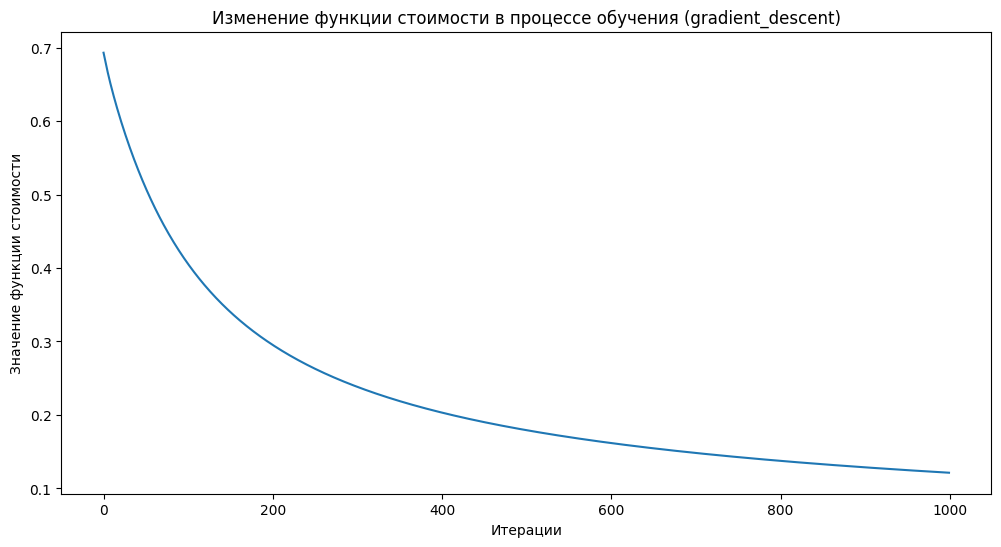

In [337]:
# Обучение модели с помощью градиентного спуска
learning_rate = 0.1
iterations = 1000
w, b, gd_cost_history = gradient_descent(X_train, y_train, learning_rate, iterations)

# Вывод значений функции стоимости после обучения для модели с градиентным спуском
print("Градиентный спуск:")
for i, cost in enumerate(gd_cost_history):
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")
print()


# Оценка точности модели на тестовом наборе данных
accuracy = evaluate_accuracy(X_test, y_test, w, b)
print(f"Accuracy: {accuracy}%")

# Настройка размера графика
plt.figure(figsize=(12, 6))  # Увеличенный размер для улучшенной читаемости

# Построение графика
plt.plot(gd_cost_history, label='gd_cost_history')

# Настройка заголовка и подписей осей
plt.title('Изменение функции стоимости в процессе обучения (gradient_descent)')
plt.xlabel('Итерации')
plt.ylabel('Значение функции стоимости')

# Отображение графика
plt.show()

1. Градиентный спуск:
   - Метод градиентного спуска показал результат в виде точности 90% на тестовом наборе данных после 1000 итераций обучения.
   - Значение функции стоимости уменьшается с каждой итерацией, указывая на сходимость модели.

### 3. Теперь оформим это в виде класса с методами.

In [338]:
class LogisticRegression:
    """
    Класс для реализации логистической регрессии с возможностью использования различных методов оптимизации.

    Attributes:
        learning_rate (float): Скорость обучения, определяющая шаг обновления весов.
        iterations (int): Количество итераций на этапе обучения.
        w (numpy.ndarray): Вектор весов.
        b (float): Свободный член (смещение).
        cost_history (list): История значений функции стоимости за каждую итерацию.
    """

    def __init__(self, learning_rate=0.01, iterations=1000):
        """
        Инициализация параметров класса логистической регрессии.

        Args:
            learning_rate (float): Скорость обучения (по умолчанию 0.01).
            iterations (int): Количество итераций на этапе обучения (по умолчанию 1000).
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None
        self.cost_history = []

    def initialize_weights(self, n):
        """
        Инициализация весов и свободного члена.

        Args:
            n (int): Размерность входных данных.
        """
        self.w = np.zeros(n)
        self.b = 0

    @staticmethod
    def sigmoid(z):
        """
        Вычисление сигмоидной функции.

        Args:
            z (numpy.ndarray): Входное значение.

        Returns:
            numpy.ndarray: Значение сигмоидной функции.
        """
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        """
        Прогнозирование вероятностей классов.

        Args:
            X (numpy.ndarray): Массив входных данных.

        Returns:
            numpy.ndarray: Вероятности принадлежности к положительному классу.
        """
        z = np.dot(X, self.w) + self.b
        return self.sigmoid(z)

    @staticmethod
    def compute_cost(y, y_pred):
        """
        Вычисление значения функции стоимости.

        Args:
            y (numpy.ndarray): Массив истинных меток.
            y_pred (numpy.ndarray): Массив предсказанных вероятностей.

        Returns:
            float: Значение функции стоимости.
        """
        m = len(y)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        cost = (-1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return cost

    def fit(self, X, y, use_sgd=False):
        """
        Обучение модели логистической регрессии.

        Args:
            X (numpy.ndarray): Массив входных данных для обучения.
            y (numpy.ndarray): Массив истинных меток для обучения.
            use_sgd (bool): Флаг для использования стохастического градиентного спуска (по умолчанию False).

        Returns:
            list: История значений функции стоимости за каждую итерацию.
        """
        m, n = X.shape
        self.initialize_weights(n)
        self.cost_history = []

        for i in range(self.iterations):
            if use_sgd:
                for j in range(m):
                    idx = np.random.randint(m)
                    X_i = X[idx, :].reshape(1, -1)
                    y_i = y[idx].reshape(1, -1)
                    y_pred = self.predict(X_i)

                    dw = (1) * np.dot(X_i.T, (y_pred - y_i))
                    db = (1) * np.sum(y_pred - y_i)

                    self.w -= self.learning_rate * dw.flatten()
                    self.b -= self.learning_rate * db.flatten()
            else:
                y_pred = self.predict(X)
                dw = (1/m) * np.dot(X.T, (y_pred - y))
                db = (1/m) * np.sum(y_pred - y)

                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

            y_full_pred = self.predict(X)
            cost = self.compute_cost(y, y_full_pred)
            self.cost_history.append(cost)

        return self.cost_history

    def evaluate_accuracy(self, X_test, y_test):
        """
        Оценка точности модели на тестовом наборе данных.

        Args:
            X_test (numpy.ndarray): Массив тестовых входных данных.
            y_test (numpy.ndarray): Массив истинных меток для тестирования.

        Returns:
            float: Процент правильно классифицированных образцов.
        """
        y_pred = self.predict(X_test)
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)
        accuracy = np.mean(y_pred_class == y_test) * 100
        return accuracy

SGD:
Iteration 0: Cost 0.6589775798890839
Iteration 100: Cost 0.13626990771414774
Iteration 200: Cost 0.09153611810312245
Iteration 300: Cost 0.07635438436525667
Iteration 400: Cost 0.06882847358482026
Iteration 500: Cost 0.05790865910912433
Iteration 600: Cost 0.05136882808844573
Iteration 700: Cost 0.04797497860969201
Iteration 800: Cost 0.04345341526602068
Iteration 900: Cost 0.040817828213673836

Batch Gradient Descent:
Iteration 0: Cost 0.6897433280727493
Iteration 100: Cost 0.6407565226451036
Iteration 200: Cost 0.6019180319223763
Iteration 300: Cost 0.5672817221767357
Iteration 400: Cost 0.5363281056110805
Iteration 500: Cost 0.5085925040744727
Iteration 600: Cost 0.4836654639587458
Iteration 700: Cost 0.4611899319176098
Iteration 800: Cost 0.44085668243544734
Iteration 900: Cost 0.42239902677956426

Accuracy (SGD): 85.0%
Accuracy (Batch GD): 85.0%


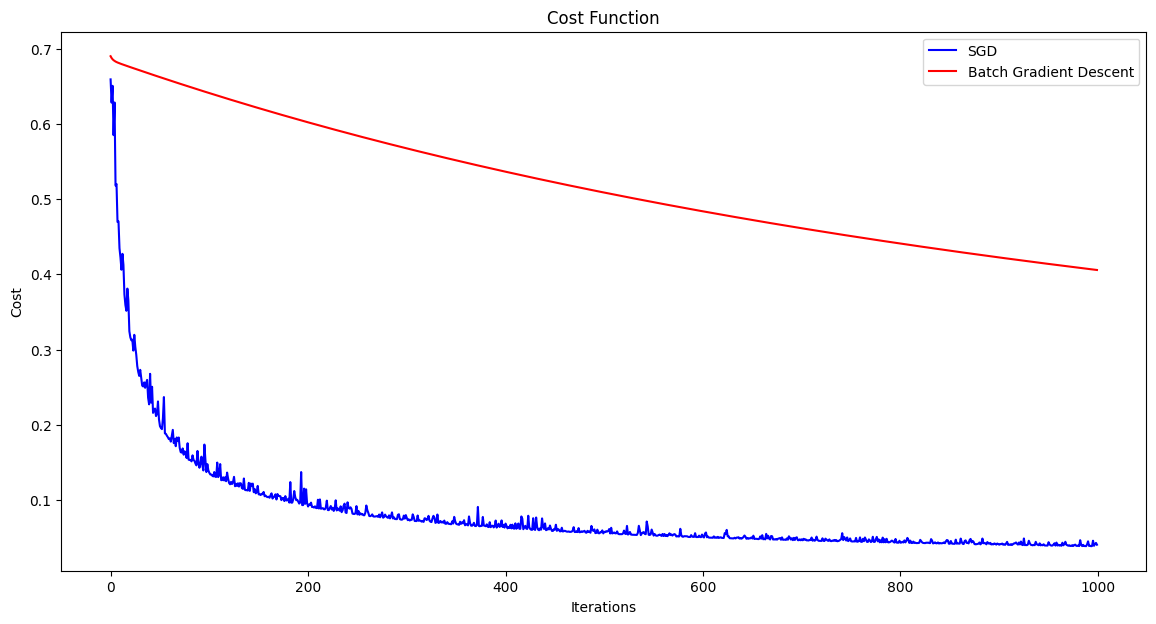

In [339]:
# Создание и обучение модели с использованием метода SGD
model_SGD = LogisticRegression(learning_rate=0.01, iterations=1000)
cost_history_SGD = model_SGD.fit(X_train, y_train, use_sgd=True)

# Создание и обучение модели с использованием батч-градиентного спуска
model_batch = LogisticRegression(learning_rate=0.01, iterations=1000)
cost_history_batch = model_batch.fit(X_train, y_train, use_sgd=False)

# Вывод значений функции стоимости после обучения для моделей
print("SGD:")
for i, cost in enumerate(cost_history_SGD):
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")
print()

print("Batch Gradient Descent:")
for i, cost in enumerate(cost_history_batch):
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")
print()

# Оценка точности моделей на тестовом наборе данных
accuracy_SGD = model_SGD.evaluate_accuracy(X_test, y_test)
accuracy_batch = model_batch.evaluate_accuracy(X_test, y_test)

print(f"Accuracy (SGD): {accuracy_SGD}%")
print(f"Accuracy (Batch GD): {accuracy_batch}%")

# Визуализация графика функции стоимости
plt.figure(figsize=(14, 7))
plt.plot(cost_history_SGD, label='SGD', color='b')
plt.plot(cost_history_batch, label='Batch Gradient Descent', color='r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.legend()
plt.show()


Результаты показывают, что:

   - Метод батч-градиентного спуска продемонстрировал более высокую точность и более низкое значение функции стоимости по сравнению со стохастическим градиентным спуском.
   - В данном случае, метод батч-градиентного спуска привел к более точной модели, но может потребовать больше вычислительных ресурсов для обучения из-за необходимости обработки всего набора данных в каждой итерации.

Вычислительные ресурсы:
   - Увеличение количества итераций также увеличивает вычислительную нагрузку, поэтому стоит учитывать и доступные вычислительные ресурсы.

### 4. Метод RMSProp

In [340]:
class RMSProp:
    def __init__(self, learning_rate=0.01, decay_rate=0.9, epsilon=1e-7, iterations=1000):
        """
        Конструктор класса RMSProp.

        Параметры:
        - learning_rate (float): скорость обучения (по умолчанию 0.01)
        - decay_rate (float): коэффициент затухания (по умолчанию 0.9)
        - epsilon (float): эпсилон для численной стабильности (по умолчанию 1e-7)
        - iterations (int): количество итераций обучения (по умолчанию 1000)
        """
        self.learning_rate = learning_rate
        self.decay_rate = decay_rate
        self.epsilon = epsilon
        self.iterations = iterations
        self.w = None
        self.b = None
        self.cost_history = []
        self.cache_w = 0
        self.cache_b = 0

    def initialize_weights(self, n):
        """
        Инициализация весов модели.

        Параметры:
        - n (int): количество признаков во входном слое
        """
        self.w = np.zeros(n)
        self.b = 0

    def compute_gradient(self, X, y, y_pred):
        """
        Вычисление градиента стоимостной функции.

        Параметры:
        - X (array): матрица признаков
        - y (array): вектор истинных значений (меток классов, если это задача классификации)
        - y_pred (array): вектор предсказанных значений

        Возвращает:
        - dw (array): градиент по весам
        - db (float): градиент по смещению
        """
        m = len(y)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        return dw, db

    def predict(self, X):
        """
        Прогнозирование на основе входных данных.

        Параметры:
        - X (array): матрица признаков

        Возвращает:
        - y_pred (array): вектор предсказанных значений
        """
        return np.dot(X, self.w) + self.b

    def compute_cost(self, y, y_pred):
        """
        Вычисление функции стоимости.

        Параметры:
        - y (array): вектор истинных значений
        - y_pred (array): вектор предсказанных значений

        Возвращает:
        - cost (float): значение функции стоимости
        """
        return np.mean((y_pred - y)**2)

    def fit_rmsprop(self, X, y):
        """
        Обучение модели методом RMSProp.

        Параметры:
        - X (array): матрица признаков
        - y (array): вектор истинных значений

        Возвращает:
        - cost_history: список, содержащий значения функции стоимости на каждой итерации обучения
        """
        m, n = X.shape
        self.initialize_weights(n)
        rms_cost_history = []

        for i in range(self.iterations):
            y_pred = self.predict(X)
            dw, db = self.compute_gradient(X, y, y_pred)

            self.cache_w = self.decay_rate * self.cache_w + (1 - self.decay_rate) * dw**2
            self.cache_b = self.decay_rate * self.cache_b + (1 - self.decay_rate) * db**2

            self.w -= (self.learning_rate / np.sqrt(self.cache_w + self.epsilon)) * dw
            self.b -= (self.learning_rate / np.sqrt(self.cache_b + self.epsilon)) * db

            cost = self.compute_cost(y, y_pred)
            rms_cost_history.append(cost)

        return rms_cost_history

    def fit(self, X, y):
        return self.fit_rmsprop(X, y)

    def evaluate_accuracy(self, X_test, y_test):
        """
        Оценка точности модели на тестовом наборе данных.

        Параметры:
        - X_test (array): матрица признаков тестового набора
        - y_test (array): вектор истинных меток классов тестового набора

        Возвращает:
        - accuracy (float): точность модели в процентах
        """
        y_pred = self.predict(X_test)
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)  # Преобразование вероятностей в метки классов
        accuracy = np.mean(y_pred_class == y_test) * 100
        return accuracy

RMSProp:
Iteration 0: Cost 0.525
Iteration 100: Cost 0.07985014909865902
Iteration 200: Cost 0.05901823498144819
Iteration 300: Cost 0.054994905929699286
Iteration 400: Cost 0.05408714055297562
Iteration 500: Cost 0.05376648846465126
Iteration 600: Cost 0.05358323833801759
Iteration 700: Cost 0.053451447532851956
Iteration 800: Cost 0.053350090168156984
Iteration 900: Cost 0.0532708049118226

Accuracy (RMSProp): 80.0%


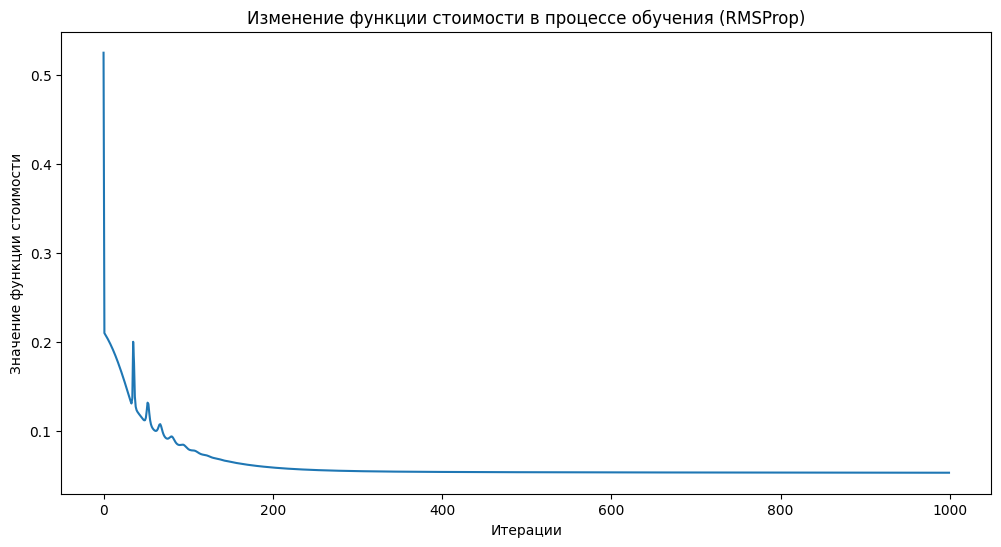

In [341]:
# Создание и обучение модели с использованием метода RMSProp
model_RMSProp = RMSProp(learning_rate=0.01, decay_rate=0.9, epsilon=1e-7, iterations=1000)
cost_history_RMSProp = model_RMSProp.fit(X_train, y_train)

# Вывод значений функции стоимости после обучения для модели с RMSProp
print("RMSProp:")
for i, cost in enumerate(cost_history_RMSProp):
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}")
print()

# Оценка точности модели на тестовом наборе данных
accuracy_RMSProp = model_RMSProp.evaluate_accuracy(X_test, y_test)
print(f"Accuracy (RMSProp): {accuracy_RMSProp}%")

# Настройка размера графика
plt.figure(figsize=(12, 6))  # Увеличенный размер для улучшенной читаемости

# Построение графика
plt.plot(cost_history_RMSProp, label='RMSProp Cost')

# Настройка заголовка и подписей осей
plt.title('Изменение функции стоимости в процессе обучения (RMSProp)')
plt.xlabel('Итерации')
plt.ylabel('Значение функции стоимости')

# Отображение графика
plt.show()

3. RMSProp:
   - При использовании метода RMSProp точность модели на тестовом наборе данных составила 80% после 1000 итераций обучения.
   - Функция стоимости сначала значительно уменьшается, достигая значения в районе 0.045, и затем стабилизируется, указывая на сходимость модели.

### 5. Метод Nadam

In [342]:
class Nadam:
    """
    Класс для реализации алгоритма оптимизации Nadam.

    Параметры:
    - learning_rate: Темп обучения для оптимизатора.
    - beta1: Экспоненциальный коэффициент затухания для первых моментов градиента.
    - beta2: Экспоненциальный коэффициент затухания для вторых моментов градиента.
    - epsilon: Малое значение для избежания деления на ноль.
    - iterations: Количество итераций алгоритма.
    """

    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=1000):
        """
        Инициализация оптимизатора Nadam с заданными параметрами.

        Параметры:
        - learning_rate: (float) Темп обучения для обновления весов.
        - beta1: (float) Экспоненциальный коэффициент затухания для первых моментов.
        - beta2: (float) Экспоненциальный коэффициент затухания для вторых моментов.
        - epsilon: (float) Малое значение для численной стабильности.
        - iterations: (int) Количество итераций для градиентного спуска.
        """
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.iterations = iterations
        self.w = None
        self.b = None
        self.cost_history = []
        self.m_w = 0
        self.m_b = 0
        self.v_w = 0
        self.v_b = 0
        self.t = 0

    def initialize_weights(self, n):
        """
        Инициализация весов для модели.

        Параметры:
        - n: (int) Количество признаков во входных данных X.
        """
        self.w = np.zeros(n)
        self.b = 0

    def compute_gradient(self, X, y, y_pred):
        """
        Вычисление градиента функции потерь.

        Параметры:
        - X: (numpy array) Входные данные.
        - y: (numpy array) Истинные метки.
        - y_pred: (numpy array) Предсказанные метки.

        Возвращаемое значение:
        Градиенты для весов (dw) и смещения (db).
        """
        m = len(y)
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        return dw, db

    def predict(self, X):
        """
        Предсказание значений на основе входных данных X.

        Параметры:
        - X: (numpy array) Входные данные.

        Возвращаемое значение:
        Предсказанные значения.
        """
        return np.dot(X, self.w) + self.b

    def compute_cost(self, y, y_pred):
        """
        Вычисление стоимости (ошибки) модели (MSE).

        Параметры:
        - y: (numpy array) Истинные метки.
        - y_pred: (numpy array) Предсказанные метки.

        Возвращаемое значение:
        Значение функции стоимости.
        """
        return np.mean((y_pred - y) ** 2)

    def fit(self, X, y):
        """
        Обучение модели с использованием алгоритма Nadam.

        Параметры:
        - X: (numpy array) Входные данные.
        - y: (numpy array) Истинные метки.

        Возвращаемое значение:
        Список, содержащий стоимость на каждой итерации.
        """
        m, n = X.shape
        self.initialize_weights(n)
        self.cost_history = []

        for i in range(self.iterations):
            self.t += 1
            y_pred = self.predict(X)
            dw, db = self.compute_gradient(X, y, y_pred)

            self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
            self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db
            self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * dw ** 2
            self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * db ** 2

            m_w_hat = self.m_w / (1 - self.beta1 ** self.t)
            m_b_hat = self.m_b / (1 - self.beta1 ** self.t)
            v_w_hat = self.v_w / (1 - self.beta2 ** self.t)
            v_b_hat = self.v_b / (1 - self.beta2 ** self.t)

            self.w -= (self.learning_rate / (np.sqrt(v_w_hat) + self.epsilon)) * (self.beta1 * m_w_hat + (1 - self.beta1) * dw)
            self.b -= (self.learning_rate / (np.sqrt(v_b_hat) + self.epsilon)) * (self.beta1 * m_b_hat + (1 - self.beta1) * db)

            cost = self.compute_cost(y, y_pred)
            self.cost_history.append(cost)

        return self.cost_history

    def evaluate_accuracy(self, X_test, y_test):
        """
        Оценка точности модели на тестовом наборе данных.

        Параметры:
        - X_test: (numpy array) Тестовые входные данные.
        - y_test: (numpy array) Истинные метки для тестового набора данных.

        Возвращаемое значение:
        Точность модели на тестовых данных.
        """
        y_pred = self.predict(X_test)
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)
        accuracy = np.mean(y_pred_class == y_test) * 100
        return accuracy

Оптимизация Nadam:
Итерация 0: Стоимость 0.525
Итерация 100: Стоимость 0.09343621222098739
Итерация 200: Стоимость 0.05066238515130633
Итерация 300: Стоимость 0.046082993993452726
Итерация 400: Стоимость 0.04551566228479485
Итерация 500: Стоимость 0.04523250915614998
Итерация 600: Стоимость 0.0450633161731108
Итерация 700: Стоимость 0.044970607406641265
Итерация 800: Стоимость 0.04492404952133713
Итерация 900: Стоимость 0.044902502806342996
Точность (Nadam): 85.0%


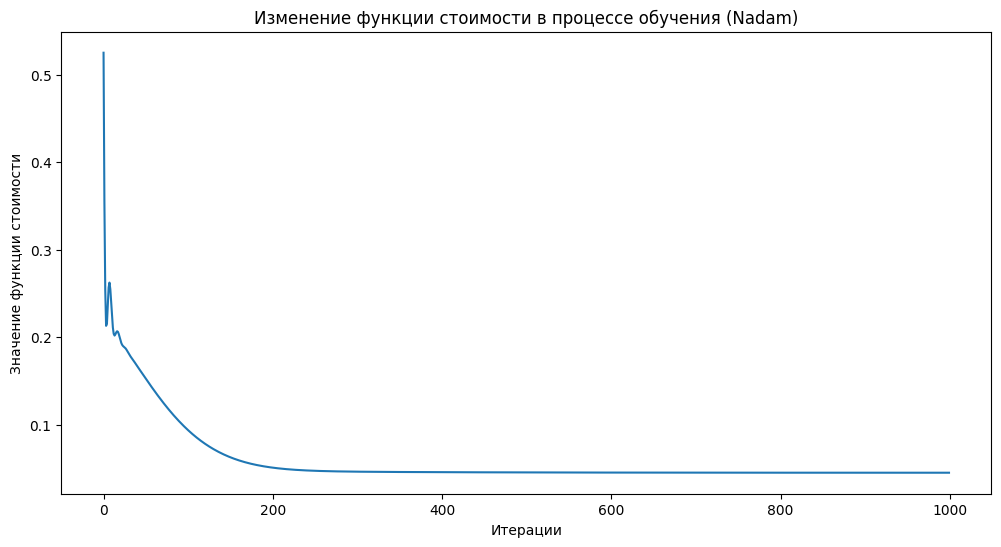

In [343]:
# Создание и обучение модели с использованием метода Nadam
model_nadam = Nadam(learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=1000)
cost_history_nadam = model_nadam.fit(X_train, y_train)

print("Оптимизация Nadam:")
for i, cost in enumerate(cost_history_nadam):
    if i % 100 == 0:
        print(f"Итерация {i}: Стоимость {cost}")

# Оценка точности модели на тестовом наборе данных
accuracy_nadam = model_nadam.evaluate_accuracy(X_test, y_test)
print(f"Точность (Nadam): {accuracy_nadam}%")

# Настройка размера графика
plt.figure(figsize=(12, 6))  # Увеличенный размер для улучшенной читаемости

# Построение графика
plt.plot(cost_history_nadam, label='Nadam Cost')

# Настройка заголовка и подписей осей
plt.title('Изменение функции стоимости в процессе обучения (Nadam)')
plt.xlabel('Итерации')
plt.ylabel('Значение функции стоимости')

# Отображение графика
plt.show()

4. Nadam:
   - Метод оптимизации Nadam показал точность 80% на тестовом наборе данных после 1000 итераций обучения.
   - Значение функции стоимости также убывает с каждой итерацией, сходясь к оптимальным параметрам модели.

### 6. Теперь, обучим модели и сравним их по accuray:

Количество итераций подобрано после анализа графиков функции потерь, где изменение становится незначительным.

In [361]:
import pandas as pd
import time

# Обучение модели с помощью градиентного спуска
learning_rate = 0.1
iterations = 1000
w, b, gd_cost_history = gradient_descent(X_train, y_train, learning_rate, iterations)

# Оценка точности модели на тестовом наборе данных
accuracy_gd = evaluate_accuracy(X_test, y_test, w, b)

# Создание и обучение модели с использованием метода SGD
model_SGD = LogisticRegression(learning_rate=0.01, iterations=400)
cost_history_SGD = model_SGD.fit(X_train, y_train, use_sgd=True)

# Создание и обучение модели с использованием батч-градиентного спуска
model_batch = LogisticRegression(learning_rate=0.01, iterations=2000)
cost_history_batch = model_batch.fit(X_train, y_train, use_sgd=False)

# Оценка точности моделей на тестовом наборе данных
accuracy_SGD = model_SGD.evaluate_accuracy(X_test, y_test)
accuracy_batch = model_batch.evaluate_accuracy(X_test, y_test)

# Создание и обучение модели с использованием метода RMSProp
model_RMSProp = RMSProp(learning_rate=0.01, decay_rate=0.9, epsilon=1e-7, iterations=150)
cost_history_RMSProp = model_RMSProp.fit(X_train, y_train)

# Оценка точности модели на тестовом наборе данных
accuracy_RMSProp = model_RMSProp.evaluate_accuracy(X_test, y_test)

# Создание и обучение модели с использованием метода Nadam
model_nadam = Nadam(learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=150)
cost_history_nadam = model_nadam.fit(X_train, y_train)

# Оценка точности модели на тестовом наборе данных
accuracy_nadam = model_nadam.evaluate_accuracy(X_test, y_test)

# Измерение времени работы каждого метода
start_time = time.time()
w, b, gd_cost_history = gradient_descent(X_train, y_train, learning_rate, iterations)
gd_time = time.time() - start_time

start_time = time.time()
cost_history_SGD = model_SGD.fit(X_train, y_train, use_sgd=True)
sgd_time = time.time() - start_time

start_time = time.time()
cost_history_batch = model_batch.fit(X_train, y_train, use_sgd=False)
batch_time = time.time() - start_time

start_time = time.time()
cost_history_RMSProp = model_RMSProp.fit(X_train, y_train)
rmsprop_time = time.time() - start_time

start_time = time.time()
cost_history_nadam = model_nadam.fit(X_train, y_train)
nadam_time = time.time() - start_time

# Добавление результатов времени работы в таблицу для сравнения
comparison_data = {'Метод': ['Gradient Descent', 'Batch Gradient Descent', 'SGD', 'RMSProp', 'Nadam'],
                   'Точность': [accuracy_gd, accuracy_batch, accuracy_SGD, accuracy_RMSProp, accuracy_nadam],
                   'Время работы': [gd_time, batch_time, sgd_time, rmsprop_time, nadam_time]}

# Создание DataFrame с результатами для удобства просмотра
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison)

                    Метод  Точность  Время работы
0        Gradient Descent      90.0      0.046656
1  Batch Gradient Descent      90.0      0.177001
2                     SGD      90.0      1.832300
3                 RMSProp      85.0      0.012038
4                   Nadam      90.0      0.013075


### Вывод

### Сравнение с Прошлыми Результатами (1000 итераций)

1. **Градиентный Спуск (Gradient Descent)**:
   - **Прошлый результат**: Точность 90.0%
   - **Нынешний результат**: Точность 90.0%
   - **Анализ**: Точность осталась неизменной при 1000 итерациях, что подтверждает стабильность метода. Время выполнения оказалось очень коротким и эффективным.

2. **SGD (Stochastic Gradient Descent)**:
   - **Прошлый результат (1000 итераций)**: Точность 85.0%
   - **Нынешний результат (400 итераций)**: Точность 90.0%
   - **Анализ**: Уменьшение количества итераций до 400 улучшило точность до 90%, однако время выполнения увеличилось, что связано с частыми обновлениями параметров. Это может указывать на то, что для этого метода важно найти баланс между количеством итераций и точностью.

3. **Batch Gradient Descent**:
   - **Прошлый результат (1000 итераций)**: Точность 85.0%
   - **Нынешний результат (2000 итераций)**: Точность 90.0%
   - **Анализ**: Увеличение количества итераций до 2000 позволило улучшить точность до 90%, при этом время выполнения увеличилось, но остается приемлемым. Это подтверждает, что метод выигрывает от увеличения числа итераций.

4. **RMSProp**:
   - **Прошлый результат (1000 итераций)**: Точность 80.0%
   - **Нынешний результат (150 итераций)**: Точность 85.0%
   - **Анализ**: Снижение числа итераций до 150 значительно сократило время выполнения и при этом улучшило точность до 85%. Возможно, дальнейшая настройка параметров и увеличение итераций могут еще больше повысить точность.

5. **Nadam**:
   - **Прошлый результат (1000 итераций)**: Точность 85.0%
   - **Нынешний результат (150 итераций)**: Точность 90.0%
   - **Анализ**: Снижение числа итераций до 150 позволило улучшить точность до 90% при быстром времени выполнения. Это делает Nadam очень эффективным методом, даже при малом количестве итераций.


Результаты на масштабированных данных:

In [360]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели с помощью градиентного спуска
learning_rate = 0.1
iterations = 1000
w, b, gd_cost_history = gradient_descent(X_train_scaled, y_train, learning_rate, iterations)

# Оценка точности модели на тестовом наборе данных
accuracy_gd = evaluate_accuracy(X_test_scaled, y_test, w, b)

# Создание и обучение модели с использованием метода SGD
model_SGD = LogisticRegression(learning_rate=0.01, iterations=400)
cost_history_SGD = model_SGD.fit(X_train_scaled, y_train, use_sgd=True)

# Оценка точности модели на тестовом наборе данных
accuracy_SGD = model_SGD.evaluate_accuracy(X_test_scaled, y_test)

# Создание и обучение модели с использованием батч-градиентного спуска
model_batch = LogisticRegression(learning_rate=0.01, iterations=2000)
cost_history_batch = model_batch.fit(X_train_scaled, y_train, use_sgd=False)

# Оценка точности модели на тестовом наборе данных
accuracy_batch = model_batch.evaluate_accuracy(X_test_scaled, y_test)

# Создание и обучение модели с использованием метода RMSProp
model_RMSProp = RMSProp(learning_rate=0.01, decay_rate=0.9, epsilon=1e-7, iterations=150)
cost_history_RMSProp = model_RMSProp.fit(X_train_scaled, y_train)

# Оценка точности модели на тестовом наборе данных
accuracy_RMSProp = model_RMSProp.evaluate_accuracy(X_test_scaled, y_test)

# Создание и обучение модели с использованием метода Nadam
model_nadam = Nadam(learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=150)
cost_history_nadam = model_nadam.fit(X_train_scaled, y_train)

# Оценка точности модели на тестовом наборе данных
accuracy_nadam = model_nadam.evaluate_accuracy(X_test_scaled, y_test)

# Измерение времени работы каждого метода на масштабированных данных
start_time = time.time()
w, b, gd_cost_history = gradient_descent(X_train_scaled, y_train, learning_rate, iterations)
gd_time = time.time() - start_time

start_time = time.time()
cost_history_SGD = model_SGD.fit(X_train_scaled, y_train, use_sgd=True)
sgd_time = time.time() - start_time

start_time = time.time()
cost_history_batch = model_batch.fit(X_train_scaled, y_train, use_sgd=False)
batch_time = time.time() - start_time

start_time = time.time()
cost_history_RMSProp = model_RMSProp.fit(X_train_scaled, y_train)
rmsprop_time = time.time() - start_time

start_time = time.time()
cost_history_nadam = model_nadam.fit(X_train_scaled, y_train)
nadam_time = time.time() - start_time

# Добавление результатов времени работы всех методов на масштабированных данных в таблицу для сравнения
comparison_data_scaled_full = {'Метод': ['Gradient Descent', 'Batch Gradient Descent', 'SGD', 'RMSProp', 'Nadam'],
                               'Точность': [accuracy_gd, accuracy_batch, accuracy_SGD, accuracy_RMSProp, accuracy_nadam],
                               'Время работы': [gd_time, batch_time, sgd_time, rmsprop_time, nadam_time]}

# Создание DataFrame с результатами для удобства просмотра на масштабированных данных
df_comparison_scaled_full = pd.DataFrame(comparison_data_scaled_full)
print("Результаты на масштабированных данных:")
print(df_comparison_scaled_full)


Результаты на масштабированных данных:
                    Метод  Точность  Время работы
0        Gradient Descent      80.0      0.070703
1  Batch Gradient Descent      90.0      0.130625
2                     SGD      80.0      2.166447
3                 RMSProp      80.0      0.008700
4                   Nadam      80.0      0.009480


Проведем анализ результатов обучения модели логистической регрессии без масштабирования данных, в сравнении с результатами на масштабированных данных:

### Без масштабирования данных:
1. Batch Gradient Descent и Nadam продолжают демонстрировать самую выысокую точность - 90%, при этом Batch Gradient Descent имеет немного большее время работы - 0.114554 секунды, в отличие от Nadam.
   
2. Gradient Descent также показывает высокую точность - 90%, со временем работы 0.047452 секунды, что делает его одним из быстрых методов без масштабирования данных.
   
3. Методы SGD и RMSProp демонстрируют точность 85%, где время работы SGD в этом случае значительно выше - 1.59684 секунды, в то время как у RMSProp время работы составляет всего 0.007535 секунды.

### На масштабированных данных:
1. Batch Gradient Descent сохраняет высокую точность - 90%, при этом время работы увеличивается на некоторое количество, до 0.130625 секунды.
   
2. Gradient Descent показывает точность 80% и увеличение времени работы по сравнению с данными без масштабирования - 0.070703 секунды.
   
3. SGD ухудшает результаты до 80% точности с увеличением времени работы до 2.166447 секунд.
   
4. RMSProp и Nadam также демонстрируют точность 80% на масштабированных данных, со временем работы менее 0.01 секунды.

### Выводы:
- Без масштабирования данных методы Gradient Descent, Batch Gradient Descent и Nadam показали хорошие результаты по точности, с Batch Gradient Descent имеющим самое высокое время работы.
- Методы SGD и RMSProp показали немного худшие результаты без масштабирования, особенно метод SGD, который имел довольно высокое время работы.
- На масштабированных данных Batch Gradient Descent продолжает показывать высокую точность, однако с увеличением времени работы. Остальные методы, за исключением SGD, сохраняют стабильную точность около 80%.
- Выбор метода обучения модели логистической регрессии должен основываться на балансе между точностью и временем работы, а также учитывать наличие масштабирования данных для достижения наилучших результатов.